<font size="+12"><center>
    MVPA analysis: SVM
</font></center>

Author:
Egor Ananyev

# Preparation

## Loading packages

In [74]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd
import os

In [75]:
mne.set_log_level('warning')  # less verbose output

## Setting parameters

In [76]:
interactive = False  # Whether to render interactive figures such as channel plots
# ...should be set to True on first pass

debug = False

cur_subj = 1
numof_runs = 7

## Loading evoked data

In [77]:
# data_path = os.path.expanduser("C:\\Users\\egora\\Downloads\\meg\\")
data_path = os.path.expanduser('E:\\meg\\')

cur_subj_str = str(cur_subj).zfill(2)

epochs_list = []

for cur_run in range(numof_runs):
    cur_run_str = str(cur_run+1).zfill(2)
    fname = os.path.join(data_path,
                             'derivatives\\meg_derivatives\\sub-' + cur_subj_str + '\\ses-meg\\meg\\sub-' + \
                             cur_subj_str + '_ses-meg_experimental_run-' + cur_run_str + '_proc-sss_epo.fif')
    print(fname)
    epochs_run = mne.read_epochs(fname)
    # example append: https://www.programcreek.com/python/example/92634/mne.Epochs
    epochs_list.append(epochs_run)

E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-01_proc-sss_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-02_proc-sss_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-03_proc-sss_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-04_proc-sss_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-05_proc-sss_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-06_proc-sss_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-07_proc-sss_epo.fif


In [78]:
for i in range(len(epochs_list)):
    print(epochs_list[i].info['dev_head_t'])

<Transform  |  MEG device->head>
[[ 0.99762779 -0.05008168 -0.04722238  0.00244267]
 [ 0.04592873  0.99529868 -0.08526584 -0.02767636]
 [ 0.05127066  0.08289474  0.99523813  0.04869793]
 [ 0.          0.          0.          1.        ]]
<Transform  |  MEG device->head>
[[ 0.99810284 -0.04287035 -0.0441924   0.0025069 ]
 [ 0.04004742  0.99721628 -0.06289711 -0.02748199]
 [ 0.0467658   0.06100798  0.99704117  0.05019899]
 [ 0.          0.          0.          1.        ]]
<Transform  |  MEG device->head>
[[ 0.99834144 -0.03760644 -0.04358925  0.00234504]
 [ 0.03564318  0.99835205 -0.04497451 -0.02764969]
 [ 0.04520874  0.04334626  0.99803674  0.05217394]
 [ 0.          0.          0.          1.        ]]
<Transform  |  MEG device->head>
[[ 0.99837339 -0.03827842 -0.04224655  0.00280504]
 [ 0.03683717  0.99872935 -0.03438213 -0.02761227]
 [ 0.04350897  0.03276998  0.99851513  0.05331092]
 [ 0.          0.          0.          1.        ]]
<Transform  |  MEG device->head>
[[ 0.99817234 -

In [79]:
epochs_list[0].info

<Info | 28 non-empty fields
    acq_pars : str | 25272 items
    bads : list | 0 items
    ch_names : list | EOG001, EOG002, MEG0111, MEG0112, MEG0113, MEG0121, ...
    chs : list | 308 items (EOG: 2, MAG: 102, GRAD: 204)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 34 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 149 items (3 Cardinal, 4 HPI, 142 Extra)
    events : list | 2 items
    experimenter : str | 17 items
    file_id : dict | 4 items
    gantry_angle : float | 68.0
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    hpi_subsystem : dict | 2 items
    line_freq : float | 50.0
    lowpass : float | 80.0 Hz
    meas_date : tuple | 2020-02-05 07:22:14 GMT
    meas_id : dict | 4 items
    nchan : int | 308
    proc_history : list | 2 items
    proj_id : ndarray | 1 items
    proj_name : str | 24 items
    projs : list | 0 items
    sfreq : float | 300.0 Hz

In [80]:
# epochs = mne.epochs.concatenate_epochs(epochs_list)  # this won't work until the epochs have the same head position coordinates

The path to store MVPA-related data and visualization.

In [81]:
mvpa_path = os.path.join(data_path, 'derivatives\\meg_derivatives\\sub-' + cur_subj_str + '\\ses-meg\\meg-mvpa\\')
mvpa_fname = os.path.join(mvpa_path, 'sub-' + cur_subj_str + '_run-' + cur_run_str)

## Examining raw data

In [82]:
%matplotlib qt
if interactive:
    raw.plot()

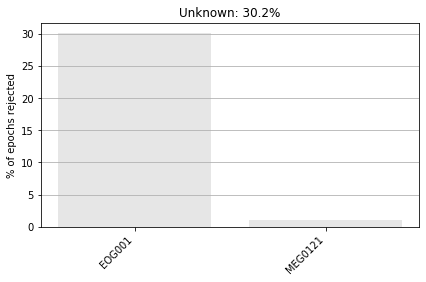

In [83]:
%matplotlib inline
epochs_list[0].plot_drop_log();

# Support Vector Machines

In [84]:
from sklearn import svm

## Logic of SVM-based classification

In [85]:
## In principle (from https://scikit-learn.org/stable/modules/svm.html):
X = [[0, 0], [1, 1], [2, 2]]  # channel measurements [n_features] on all but one trial [n_samples] at time t
y = [0, 1, 1]                 # stimulus orientation with length [n_samples]
clf = svm.LinearSVC()         # linear Support Vector Classification
clf.fit(X, y)                 # model fitting
clf.predict([[3, 3]])         # model testing on the remaining trial at time t

array([1])

In [86]:
np.shape(X)  # array of size [n_samples, n_features]

(3, 2)

## Assuming independent _t_

## Setting up routine for time _t_

In [112]:
epochs = epochs_list[0]  # TEMP
epochs = epochs.pick_types(meg=True)

In [113]:
all_times = np.round(epochs.times * 1000).astype(int)
# print(all_times)
print(np.shape(all_times))

(271,)


In [114]:
all_durs = [1, 2, 3, 4]
all_conts = [17, 33, 50, 100]

In [60]:
def run_svm(numof_epochs_, X_, y_):
    preds = []
    for cur_test_epoch in range(numof_epochs_):
        test_epoch = [X_[cur_test_epoch, :]]
        test_class = y_[cur_test_epoch]
        train_epochs = X_[np.arange(numof_epochs_)!=cur_test_epoch, :]
        train_classes = y_[np.arange(numof_epochs_)!=cur_test_epoch]
        clf = svm.LinearSVC()
        clf.fit(train_epochs, train_classes)
        preds.append(clf.predict(test_epoch).item(0))
    acc_ = sum(y_ == np.array(preds)) / numof_epochs_
    return acc_

In [144]:
def iter_times(all_times_, epochs_df_, cur_cond_str_, numof_epochs_):
    acc_ = []
    for t in all_times_:
        X_right = epochs_df_.loc[('right/'+cur_cond_str_, slice(None), t), :].values
        X_left = epochs_df_.loc[('left/'+cur_cond_str_, slice(None), t), :].values
        X = np.concatenate((X_right, X_left))
    #     print(np.shape(X))
        y = np.concatenate((np.repeat(1, len(X_right)), np.repeat(0, len(X_left))))
    #     print(np.shape(y))
        acc_.append(run_svm(numof_epochs_, X, y))
    return acc_

In [145]:
acc_index = pd.MultiIndex.from_product([all_durs, all_conts], names=['dur', 'cont'])
acc = pd.DataFrame(np.zeros((len(all_durs)*len(all_conts), len(all_times))),
                   index=acc_index, columns=all_times)
acc.head()

-300  -297  -293  -290  -287  -283  -280  -277  -273  -270  ...  \
dur cont                                                              ...   
1   17     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
    33     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
    50     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
    100    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2   17     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

           570   573   577   580   583   587   590   593   597   600  
dur cont                                                              
1   17     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
    33     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
    50     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
    100    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   17     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 271 columns]

In [147]:
for cur_dur in range(len(all_durs)):
    for cur_cont in range(len(all_conts)):
        cur_cond_str = 'dur' + str(all_durs[cur_dur]) + '/' + 'cont' + \
                       str(all_conts[cur_cont]).zfill(3)
#         print(cur_cond_str)
        epochs_subset = epochs[cur_cond_str];
#         print(epochs_subset)
        numof_epochs = len(epochs_subset)
#         print(numof_epochs)
        epochs_df = epochs_subset.to_data_frame()
#         print(epochs_df.iloc[:,0:4].head());
#         print(epochs_df.columns.values[0:21])
        cur_acc = iter_times(all_times, epochs_df, cur_cond_str, numof_epochs)
#         print(cur_acc)
        acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :] = cur_acc

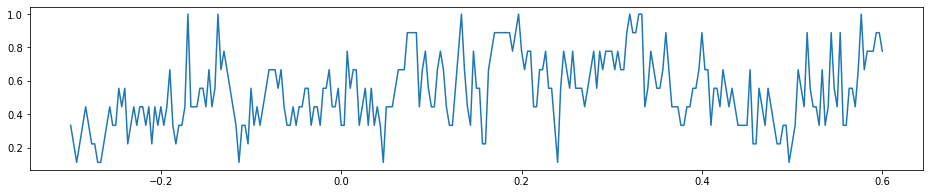

In [71]:
%matplotlib inline
plt.figure(figsize=(16, 3))
plt.plot(epochs.times, np.array(acc).T);
# plt.savefig(qc_fname + '_light-sensors.pdf')

## Applying the routine to all _t_

# P.S.

In [62]:
%matplotlib
%matplotlib qt

Using matplotlib backend: Qt5Agg


In [63]:
interactive = True